In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
import warnings
warnings.filterwarnings('ignore')

In [9]:
custom_column_names = ['WSR0','WSR1']
df = pd.read_csv('data/eighthr.csv', parse_dates=[0], index_col=0)
df = df.dropna()
df.head()

,WSR0,WSR1,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00,0.0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00,0.0
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00,0.0
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08,0.0
1998-01-07,3.7,3.2,3.8,5.1,6.0,7.0,6.3,6.4,6.3,5.4,...,0.84,6.86,25.60,5695.0,26.75,48.45,10040.0,-80.0,0.18,0.0


In [10]:
df['WSR0'] = df['WSR0'].astype(float)
df['WSR1'] = df['WSR1'].astype(float)

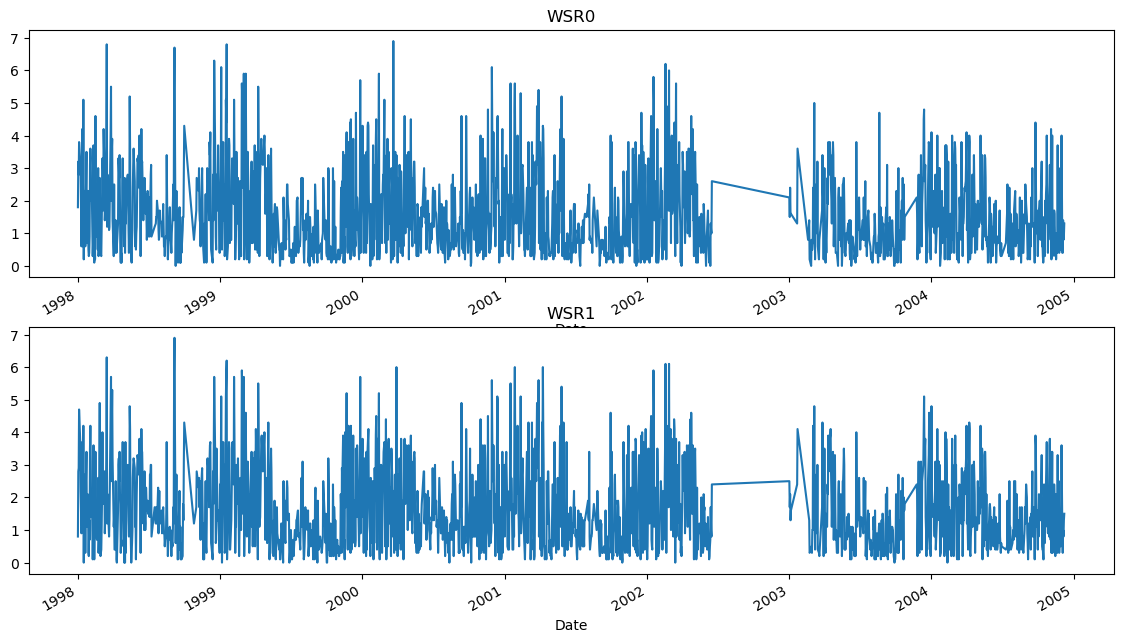

In [11]:
fig,axes = plt.subplots(2,1,figsize=(14,8))
df['WSR1'].plot(ax=axes[0],title='WSR0')
df['WSR0'].plot(ax=axes[1],title='WSR1')
plt.show()

In [12]:
result = adfuller(df['WSR0'])
print(result)
if result[1]<0.05:
    print("It is Stationary")
else:
    print("It is not stationary")

(-6.4166237469012835, 1.8344936186399158e-08, 17, 1829, {'1%': -3.4339303725739767, '5%': -2.863121534661253, '10%': -2.567611955063925}, 5719.420621835025)
It is Stationary


In [13]:
result = adfuller(df['WSR1'])
print(result)
if result[1]<0.05:
    print("It is Stationary")
else:
    print("It is not stationary")

(-8.304325492921965, 3.940935898624204e-13, 10, 1836, {'1%': -3.4339167027591952, '5%': -2.8631154999882167, '10%': -2.5676087418063327}, 5704.177126615412)
It is Stationary


In [14]:
print('WSR0 causes WSR1')
print('---------------------')
granger1=grangercausalitytests(df[['WSR0','WSR1']],2)
print('WSR1 causes WSR0')
print('---------------------')
granger1=grangercausalitytests(df[['WSR1','WSR0']],2)

WSR0 causes WSR1
---------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1176  , p=0.0238  , df_denom=1843, df_num=1
ssr based chi2 test:   chi2=5.1260  , p=0.0236  , df=1
likelihood ratio test: chi2=5.1189  , p=0.0237  , df=1
parameter F test:         F=5.1176  , p=0.0238  , df_denom=1843, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3865  , p=0.0922  , df_denom=1840, df_num=2
ssr based chi2 test:   chi2=4.7860  , p=0.0914  , df=2
likelihood ratio test: chi2=4.7798  , p=0.0916  , df=2
parameter F test:         F=2.3865  , p=0.0922  , df_denom=1840, df_num=2
WSR1 causes WSR0
---------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5489 , p=0.0004  , df_denom=1843, df_num=1
ssr based chi2 test:   chi2=12.5693 , p=0.0004  , df=1
likelihood ratio test: chi2=12.5267 , p=0.0004  , df=1
parameter F test:         F=12.5489 , p=0.0004  , df_denom=1843, df_num=1

Granger C

In [15]:
train = df[['WSR0','WSR1']]
model = VAR(train)
sortedmodel = model.select_order(maxlags=20)
sortedmodel.summary()

,AIC,BIC,FPE,HQIC
0,-0.9695,-0.9635,0.3793,-0.9673
1,-1.091,-1.073*,0.3358,-1.085*
2,-1.089,-1.058,0.3367,-1.077
3,-1.088,-1.046,0.3368,-1.073
4,-1.088,-1.034,0.3369,-1.068
5,-1.091,-1.024,0.3359,-1.066
6,-1.098,-1.020,0.3335,-1.069
7,-1.096,-1.005,0.3342,-1.063
8,-1.098,-0.9950,0.3337,-1.060
9,-1.097,-0.9820,0.3340,-1.054


In [16]:
model = VARMAX(df[['WSR0', 'WSR1']], order=(10,0),enforce_stationarity=True)
model_fit = model.fit()
model_fit.summary()

Dep. Variable:,"['WSR0', 'WSR1']",No. Observations:,1847
Model:,VAR(10),Log Likelihood,-4182.460
,+ intercept,AIC,8454.920
Date:,"Mon, 05 May 2025",BIC,8703.379
Time:,20:48:21,HQIC,8546.517
Sample:,0,,
,- 1847,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.07, 0.00",Jarque-Bera (JB):,"196.56, 7463.04"
Prob(Q):,"0.79, 0.97",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.62, 0.66",Skew:,"0.74, 0.80"


In [17]:
n_forecast = 12
pred = model_fit.get_prediction()
preds = pred.predicted_mean

In [18]:
preds.columns = ['WSR0 Predictions','WSR1 Predictions']
preds

,WSR0 Predictions,WSR1 Predictions
Date,,
1998-01-01,1.630687,1.572075
1998-01-02,1.479033,1.441289
1998-01-03,2.075244,1.978361
1998-01-04,2.063785,1.995551
1998-01-07,2.683971,2.581811
...,...,...
2004-12-04,1.397893,1.363057
2004-12-05,1.339691,1.332212
2004-12-06,1.231025,1.134638


In [19]:
train = df[['WSR0','WSR1']]
testvspread = pd.concat([train,preds],axis=1)
testvspread

,WSR0,WSR1,WSR0 Predictions,WSR1 Predictions
Date,,,,
1998-01-01,0.8,1.8,1.630687,1.572075
1998-01-02,2.8,3.2,1.479033,1.441289
1998-01-03,2.9,2.8,2.075244,1.978361
1998-01-04,4.7,3.8,2.063785,1.995551
1998-01-07,3.7,3.2,2.683971,2.581811
...,...,...,...,...
2004-12-04,0.3,0.4,1.397893,1.363057
2004-12-05,1.0,1.4,1.339691,1.332212
2004-12-06,0.8,0.8,1.231025,1.134638


<Axes: xlabel='Date'>

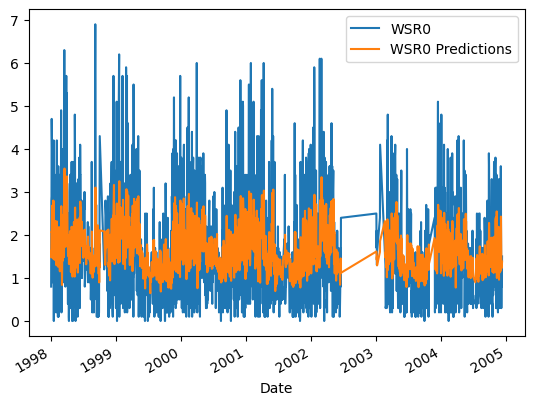

In [20]:
testvspread[['WSR0','WSR0 Predictions']].plot()

<Axes: xlabel='Date'>

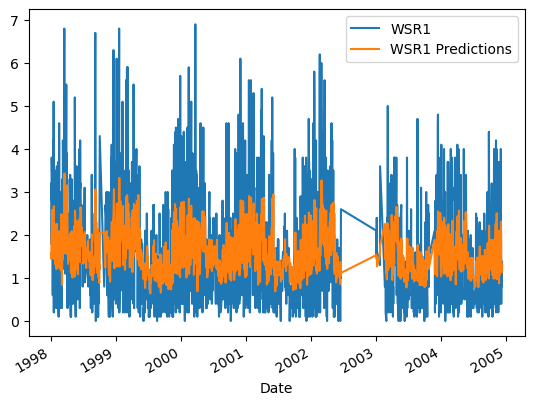

In [21]:
testvspread[['WSR1','WSR1 Predictions']].plot()

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testvspread['WSR1'],testvspread['WSR1 Predictions'])

1.3228332726310423

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testvspread['WSR0'],testvspread['WSR0 Predictions'])

1.3347643449177349